In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [11]:
df = pd.read_csv("vk.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [12]:
df.shape

(13320, 9)

In [13]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [14]:
df1 = df.drop(['area_type','society','balcony','availability'],axis = 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [15]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [16]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
df2.shape

(13246, 5)

In [18]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [23]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

C:\Users\VK\anaconda3\envs\tfv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,bedroom,vk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,2,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,4,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,3,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,3,3
4,Kothanur,2 BHK,1200,2.0,51.00,2,2,2


In [24]:
df2.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [25]:
df2[df2.bhk > 20]

,location,size,total_sqft,bath,price,bhk,bedroom,vk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27,27,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43,43,43


In [26]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [27]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [32]:
df2[~df2['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,bhk,bedroom,vk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4,4,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4,4,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2,2,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2,2,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2,2,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1,1,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2,2,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9,9,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2,2,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4,4,4


In [58]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+ float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [59]:
convert_sqft_to_num('633 - 666')

649.5

In [60]:
convert_sqft_to_num('2166')

2166.0

In [61]:
convert_sqft_to_num('633 - 666')

649.5

In [62]:
convert_sqrt_to_num('2100-2850')

In [63]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3.head(10)

,location,size,total_sqft,bath,price,bhk,bedroom,vk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,2,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,3,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,3,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,2,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,2,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,4,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,4,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,3,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,6,6


In [67]:
df3.loc[30] #last setup of data cleaning

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
bedroom               4
vk                    4
Name: 30, dtype: object

In [68]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000 / df4['total_sqft']

In [69]:
df4.head()

,location,size,total_sqft,bath,price,bhk,bedroom,vk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,2,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,3,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,3,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,2,2,4250.000000


In [70]:
len(df4.location.unique())


1304

In [75]:
df4.location = df4.location.apply(lambda x: x.strip())

location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [76]:
len(location_stats[location_stats<=10])

1052

In [77]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [79]:
len(df4.location.unique())

1293

In [80]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

242

In [81]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,bedroom,vk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,2,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,3,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,3,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,2,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,2,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,4,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,4,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,3,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,6,6,36274.509804


In [82]:
df4[df4.total_sqft/df4.bhk<100].head()

,location,size,total_sqft,bath,price,bhk,bedroom,vk,price_per_sqft
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,8,8,33333.333333
349,other,3 Bedroom,11.0,3.0,74.0,3,3,3,672727.272727
770,other,9 Bedroom,600.0,9.0,190.0,9,9,9,31666.666667
857,Vijayanagar,8 Bedroom,600.0,4.0,72.0,8,8,8,12000.000000
992,Rajaji Nagar,4 Bedroom,315.0,4.0,90.0,4,4,4,28571.428571


In [83]:
df4.shape

(13246, 9)

In [85]:
df5 = df4[~(df4.total_sqft/df4.bhk<100)]
df5.shape

(13206, 9)

In [86]:
df5.price_per_sqft.describe()

count     13160.000000
mean       6666.830652
std        4508.228739
min         267.829813
25%        4262.948207
50%        5425.015738
75%        7285.438507
max      176470.588235
Name: price_per_sqft, dtype: float64

In [88]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        n = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (n-st)) & (subdf.price_per_sqft<=(n+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

df6 = remove_pps_outliers(df5)
df6.shape

(10927, 9)

In [90]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (35,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color = 'blue',label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker ='+',color = 'green',label ='3 BHK', s = 50)
    plt.xlabel("Total square Feet Area")
    plt.ylabel("Price per square Feet")
    plt.title(location)
    plt.legend()

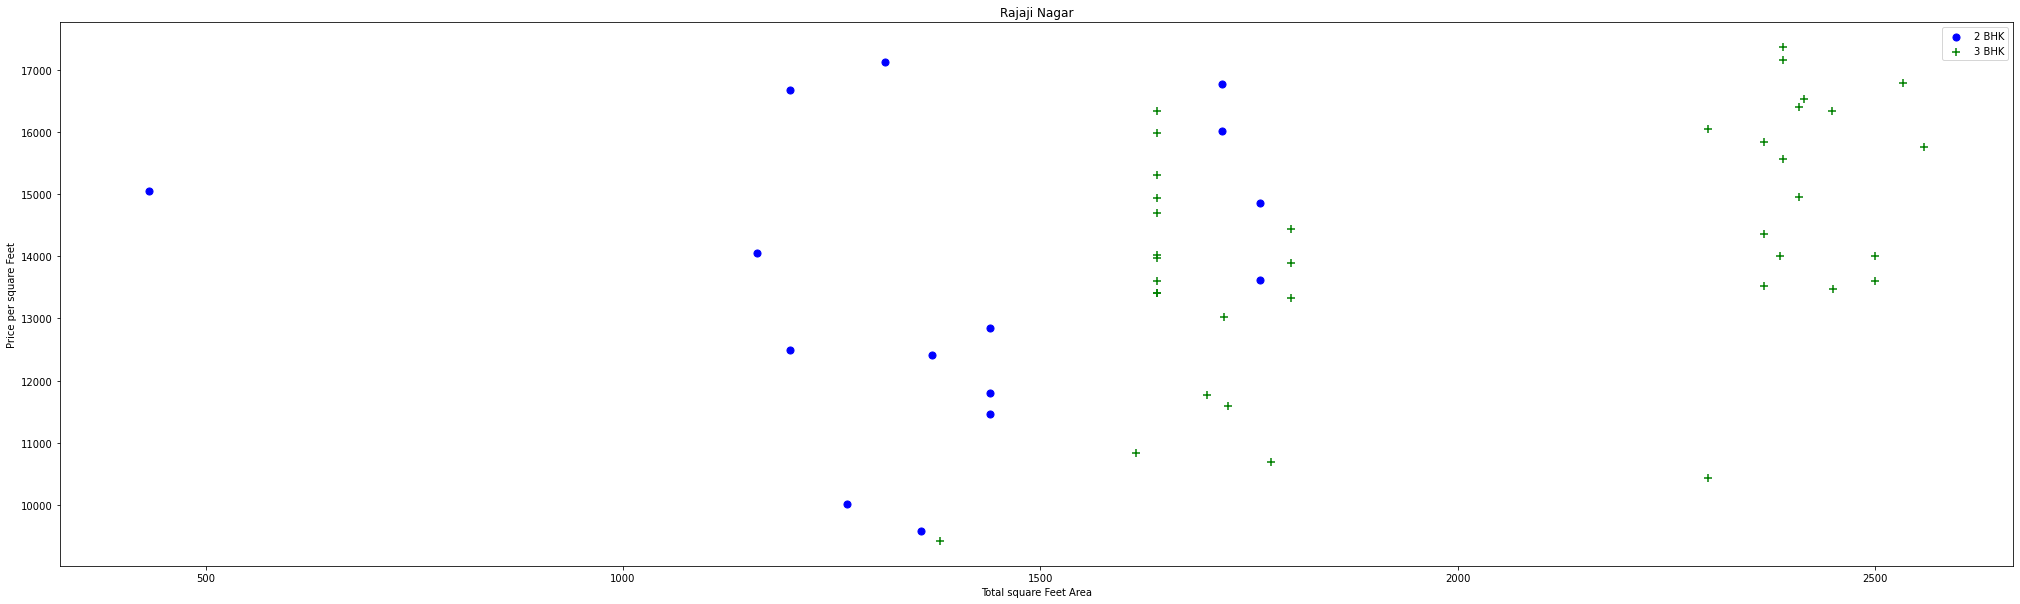

In [91]:
plot_scatter_chart(df6,"Rajaji Nagar")

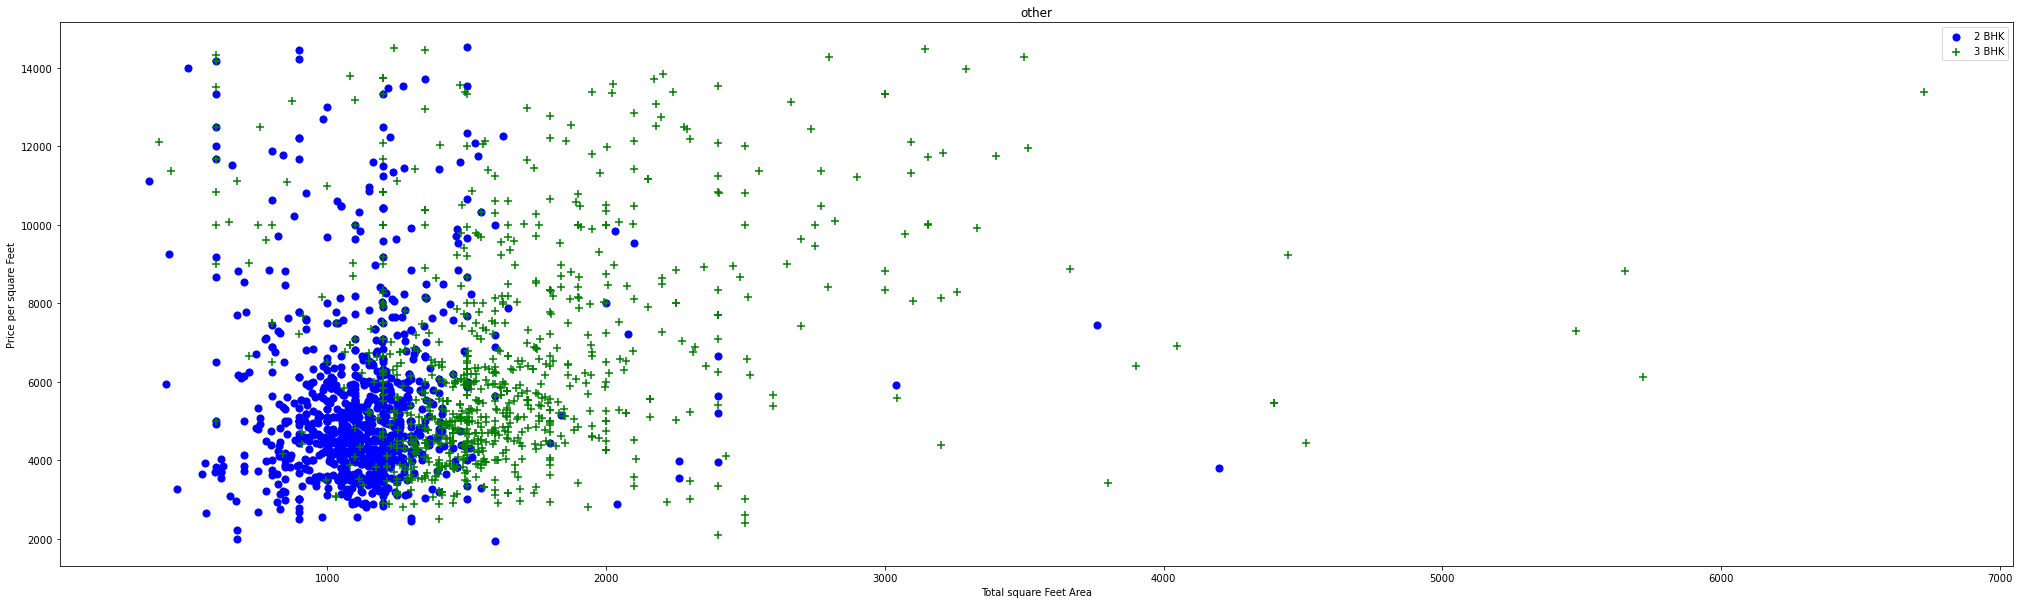

In [92]:
plot_scatter_chart(df6,"other")

In [94]:
def remove_bhk_outilers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]= {
                 'mean': np.mean(bhk_df.price_per_sqft),
                 'std': np.std(bhk_df.price_per_sqft),
                 'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis= 'index')

df7 = remove_bhk_outilers(df6)
df7.shape

(7815, 9)

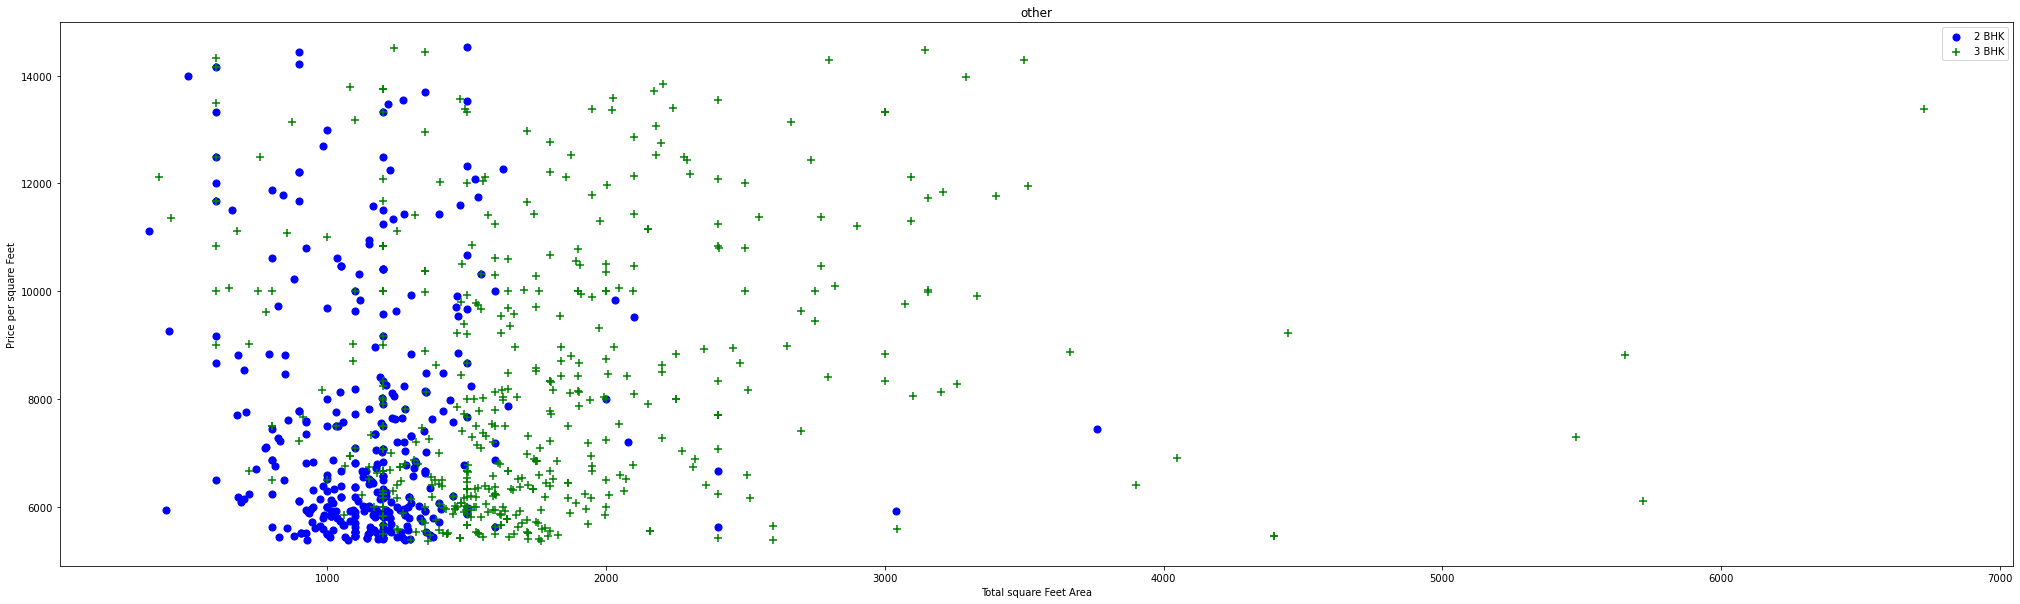

In [95]:
plot_scatter_chart(df7,"other")

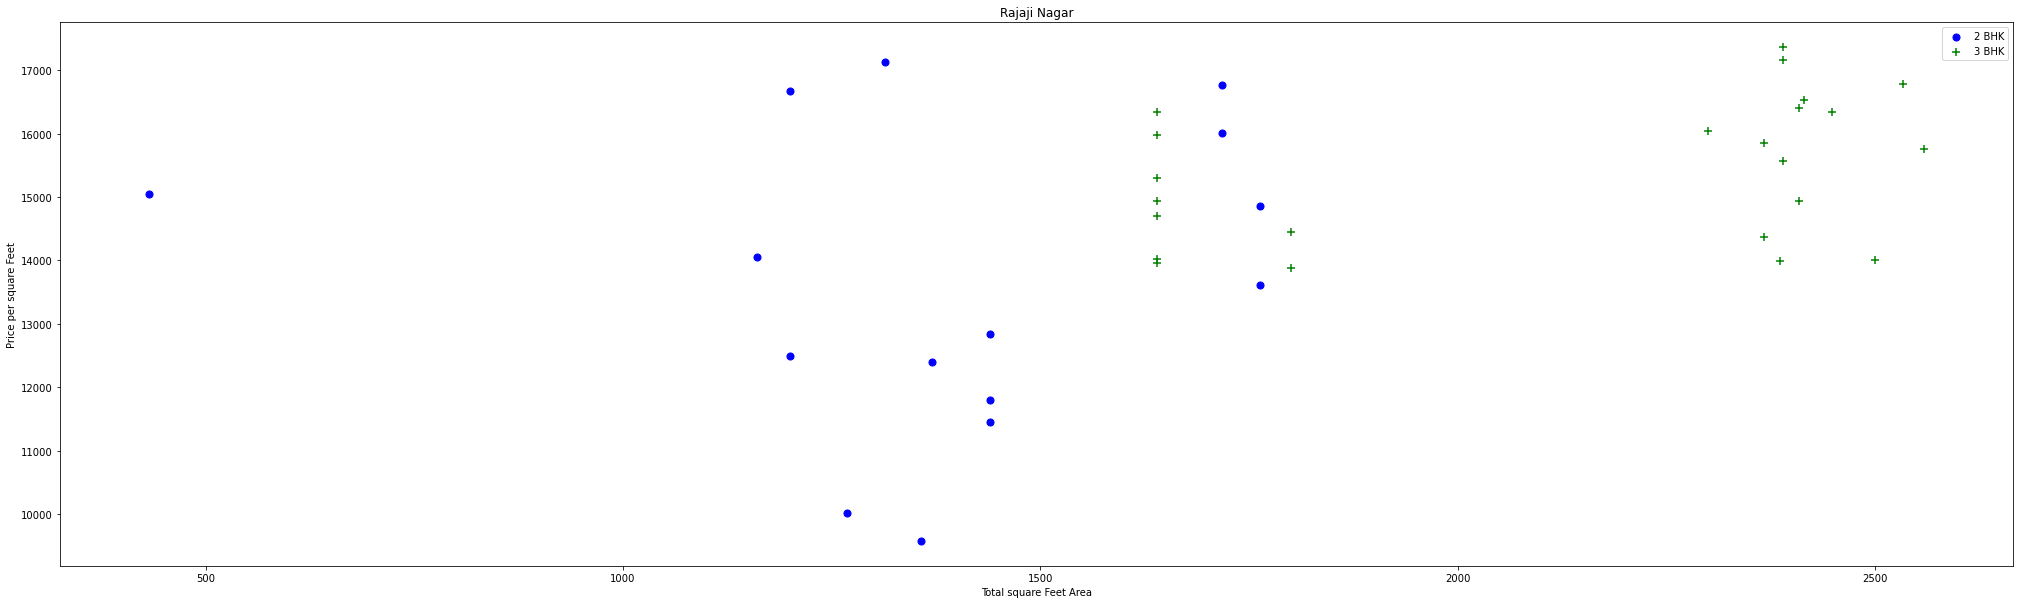

In [96]:
plot_scatter_chart(df7,"Rajaji Nagar")

TypeError: 'str' object is not callable

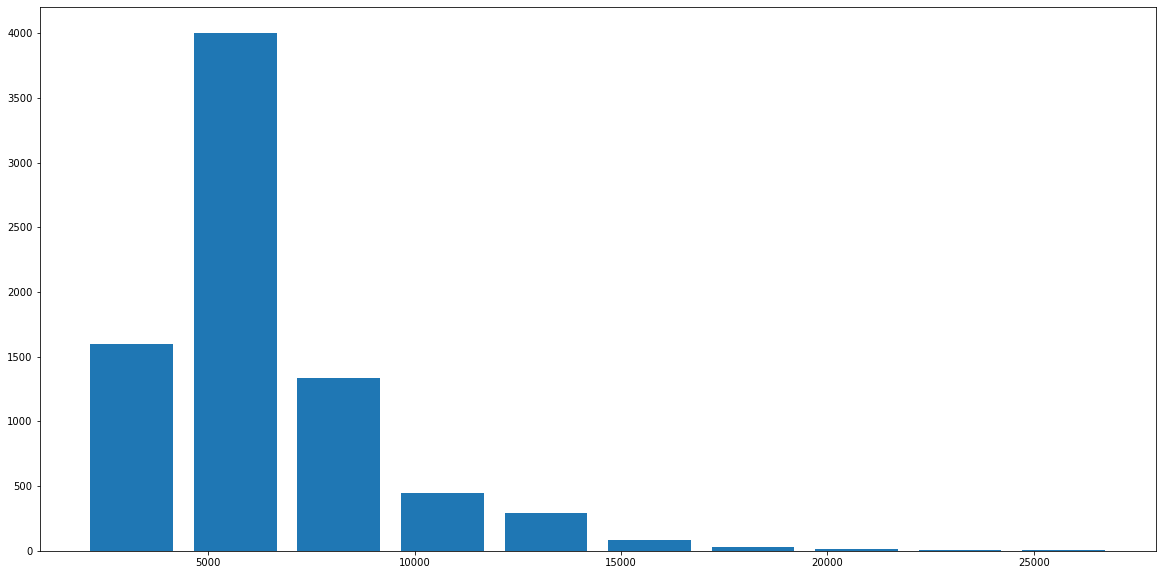

In [110]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("price_per_square_feet")
plt.ylabel("count")

In [102]:
df7.bath.unique()

array([ 4.,  3.,  6.,  2.,  5.,  1.,  8.,  7.,  9., 10., 12., 27., 11.,
       16., 13.])

In [104]:
df7[df7.bath>10].head()

,location,size,total_sqft,bath,price,bhk,bedroom,vk,price_per_sqft
5640,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,10,10,4000.000000
8748,other,27 BHK,8000.0,27.0,230.0,27,27,27,2875.000000
8753,other,11 Bedroom,1200.0,11.0,170.0,11,11,11,14166.666667
8801,other,8 Bedroom,990.0,12.0,120.0,8,8,8,12121.212121
9102,other,16 BHK,10000.0,16.0,550.0,16,16,16,5500.000000


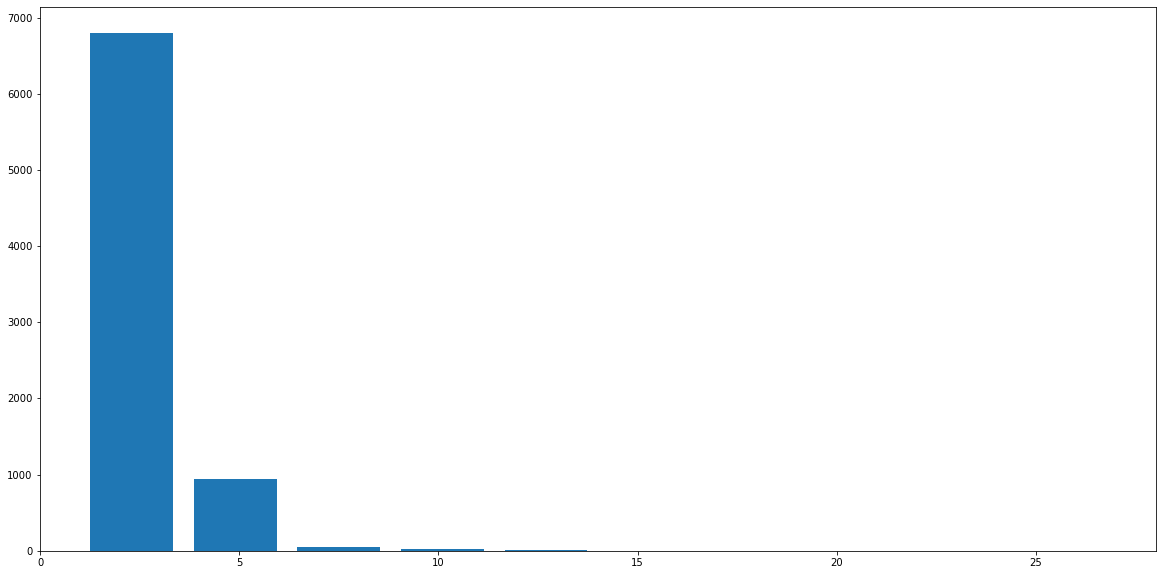

In [105]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel = ("Number of bathroom")
plt.ylabel = ("Count")

In [111]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,bedroom,vk,price_per_sqft
1634,Chamrajpet,6 Bedroom,1500.0,9.0,230.0,6,6,6,15333.333333
1770,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,4,4,3252.032520
5599,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,4,4,6428.571429
7139,Thanisandra,3 BHK,1806.0,6.0,116.0,3,3,3,6423.034330
8801,other,8 Bedroom,990.0,12.0,120.0,8,8,8,12121.212121
10283,other,6 Bedroom,1200.0,9.0,122.0,6,6,6,10166.666667


In [112]:
df7[df7.bath>df7.bhk+2]
df7.shape

(7815, 9)

In [115]:
df8 = df7.drop(['size','price_per_sqft','vk','bedroom'],axis = 'columns')
df8.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6
3,1st Block Jayanagar,1875.0,2.0,235.0,3
4,1st Block Jayanagar,930.0,4.0,85.0,7


In [119]:
dummies=pd.get_dummies(df8.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
df11 = pd.concat([df8,dummies.drop('other',axis = 'columns')],axis ='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,6.0,125.0,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
df11.shape

(7815, 246)

In [127]:
x = df11.drop(['location','price'],axis ='columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
y = df11.price
y.head()

0    428.0
1    194.0
2    125.0
3    235.0
4     85.0
Name: price, dtype: float64

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=10)

In [133]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.7825546073299895

In [137]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2,random_state = 0)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.86197633, 0.83709343, 0.82142887, 0.83312089, 0.84211921])

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha':[1,2],
                'selection': ['random','cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_    
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)
    

,model,best_score,best_params
0,linear_regression,0.839148,{'normalize': False}
1,lasso,0.721198,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.789342,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [173]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    u = np.zeros(len(x.columns))
    u[0] = sqft
    u[1] = bath
    u[2] = bhk
    if loc_index >= 0:
        u[loc_index] = 1

    return lr_clf.predict([u])[0]

In [174]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

87.32696703891546

In [176]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [177]:
predict_price('1st Phase JP Nagar',1000, 3, 2)

91.29364636693435

In [178]:
predict_price('Indira Nagar',1000, 3, 3)

178.70468940526447

In [180]:
predict_price('Indira Nagar',1000, 1, 2)

173.7198132812068

In [181]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [182]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))